<a href="https://colab.research.google.com/github/SushSushmithagowda/ML-101-projects/blob/main/Mushroom_classification_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [3]:
df = pd.read_csv("/content/mushrooms.csv")

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


In [7]:
df["class"].unique()

array(['p', 'e'], dtype=object)

In [8]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
df1 = df.astype('category')
df1.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [11]:
undummy_X = df.iloc[:,1:23]
undummy_Y = df.iloc[:, 0]
X = pd.get_dummies(undummy_X)
Y = pd.get_dummies(undummy_Y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [13]:
classifier = Sequential()
classifier.add(Dense(64, activation='relu', input_dim=117))
classifier.add(Dropout(0.4))
classifier.add(Dense(32,activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(2,activation='softmax'))


Compiling the model

In [14]:
classifier.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

Model summary

In [15]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7552      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 9,698
Trainable params: 9,698
Non-trainable params: 0
_________________________________________________________________


Fitting the model

In [16]:
history = classifier.fit(X_train, Y_train, epochs=15, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/15
204/204 [==============================] - 3s 7ms/step - loss: 0.6743 - accuracy: 0.6170 - val_loss: 0.5770 - val_accuracy: 0.9058
Epoch 2/15
204/204 [==============================] - 1s 5ms/step - loss: 0.5167 - accuracy: 0.8432 - val_loss: 0.3671 - val_accuracy: 0.9151
Epoch 3/15
204/204 [==============================] - 1s 4ms/step - loss: 0.3562 - accuracy: 0.8883 - val_loss: 0.2192 - val_accuracy: 0.9335
Epoch 4/15
204/204 [==============================] - 1s 4ms/step - loss: 0.2509 - accuracy: 0.9198 - val_loss: 0.1458 - val_accuracy: 0.9618
Epoch 5/15
204/204 [==============================] - 1s 3ms/step - loss: 0.1925 - accuracy: 0.9400 - val_loss: 0.1068 - val_accuracy: 0.9766
Epoch 6/15
204/204 [==============================] - 1s 4ms/step - loss: 0.1485 - accuracy: 0.9603 - val_loss: 0.0849 - val_accuracy: 0.9797
Epoch 7/15
204/204 [==============================] - 1s 4ms/step - loss: 0.1298 - accuracy: 0.9621 - val_loss: 0.0711 - val_accuracy: 0.9822
Epoch 

Model evaluation

In [17]:
loss, accuracy = classifier.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))
print('Loss: %.2f' % (loss*100))

51/51 [==============================] - 0s 5ms/step - loss: 0.0202 - accuracy: 0.9957
Accuracy: 99.57
Loss: 2.02


Visualize the model training

In [19]:
def plot_learningCurve(history, epoch):
  #plot training and validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Trian','Val'], loc='upper left')
  plt.show()
  #plot training and validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Trian', 'Val'], loc='upper left')
  plt.show()

Plotting the curves using the function defined above

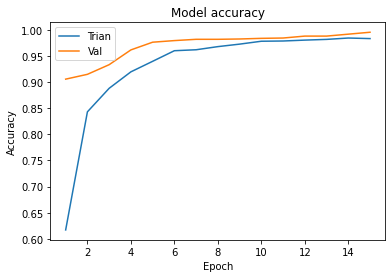

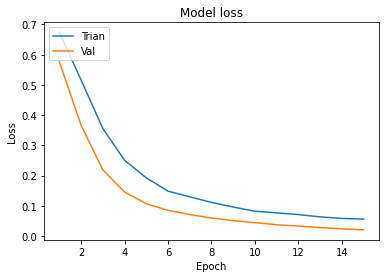

In [20]:
plot_learningCurve(history, 15)

1. In model accuracy graph validation accuracy is always greater than train accuracy that means our model is not overfitting

2. in the model loss graph validation loss is also very lower than training  loss so unless and until validation loss goes above the training loss then we can keep training our model